# Guinterface Tumour Prediction GUI

## Predicting the Progression of Cancerous Tumors in Mice: A Machine and Deep Learning Intuition

### Authors: Dr Amit K Chattopadhyay , Dr Gillian Pearce and Aimee Pascaline N Unkundiye

####  Department of Applied Mathematics and Data Science, Aston Centre for Artificial Intelligence Research and Applications (ACAIRA), Aston University, Aston Triangle, Birmingham, B4 7ET, United Kingdom



## Brief summary of document

This document outlines the development of a predictive model for tumour growth in mice, presented through a graphical user interface (GUI) that enables interactive predictions based on user input. Leveraging machine learning and mathematical models, the application forecasts tumour volume under various treatment conditions, such as saline solution. Data informing the model is sourced from prior studies on tumour progression in cancer bearing mice.


## Import modules and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from scipy.optimize import curve_fit, fsolve
import tkinter as tk
from tkinter import messagebox, ttk
import joblib



RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

###  

# 1

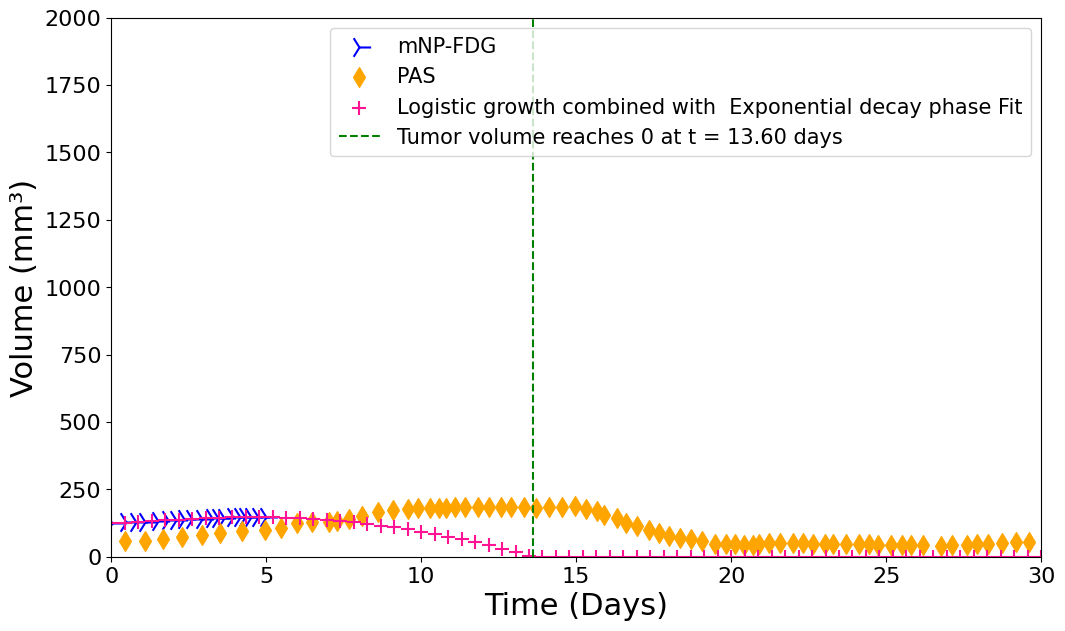

In [2]:
# Used datasets

PAS = pd.read_csv('/Users/pracyaim/Downloads/PAS70.csv')
mnpfdg = pd.read_csv('/Users/pracyaim/Downloads/mnpfdg19.csv')

mnpfdg.columns = ['Time', 'Volume']
PAS.columns = ['Time', 'Volume']


# logistic growth followed by slower exponential decay
def piecewise_logistic_growth_exponential_decay(t, A1, k1, A2, k2, t_switch, alpha, beta):
    
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Exponential decay phase, starting from t_switch
    decay = A2 * np.exp(-k2 * (t - t_switch)) - alpha * (t - t_switch) - beta * (t - t_switch)**2
    
    # Combining both phases
    return np.where(t < t_switch, logistic_growth, decay)

# Initials for parameters (A1, k1, A2, k2, t_switch, alpha, beta)
initial_guess = [147.68, 5.35, 0, 3.50, 4.74, 0.1, 0.9]

# Fit the piecewise logistic_growth_exponential_decay model to the data
popt, pcov = curve_fit(piecewise_logistic_growth_exponential_decay, mnpfdg['Time'], mnpfdg['Volume'], p0=initial_guess)

# the parameters
A1, k1, A2, k2, t_switch, alpha, beta = popt

#  prediction's time range
time_range = np.linspace(0,30, 70)

#  model prediction
predicted_volume = piecewise_logistic_growth_exponential_decay(time_range, A1, k1, A2, k2, t_switch, alpha, beta)

# Ensuring predicted volume does not go below zero
predicted_volume = np.maximum(predicted_volume, 0)

# Define a function to find when the volume reaches zero during the decay phase
def decay_phase_zero(t):
    return piecewise_logistic_growth_exponential_decay(t, A1, k1, A2, k2, t_switch, alpha, beta)

# Time when the decay phase reaches zero
time_to_zero = fsolve(decay_phase_zero, t_switch + 1)[0]


# Plotting the original data and the fitted curve
plt.figure(figsize=(12, 7))
plt.scatter(mnpfdg['Time'], mnpfdg['Volume'], color='blue',s= 280,marker='4', label='mNP-FDG')
plt.scatter(PAS['Time'], PAS['Volume'], color='orange',s= 100,marker='d', label='PAS')

plt.scatter(time_range, predicted_volume,marker='+',color ='deeppink',s=100, label='Logistic growth combined with  Exponential decay phase Fit')
plt.axvline(x=time_to_zero, color='g', linestyle='--', label=f'Tumor volume reaches 0 at t = {time_to_zero:.2f} days')
plt.xlabel('Time (Days)',fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.ylim(0, 2000)
plt.xlim(0, 30)
plt.legend(fontsize=15)
plt.title('')
plt.grid(False)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16)
plt.show()

In [3]:
# Create a DataFrame for time_range and predicted_volume
predicted_mnpfdg = pd.DataFrame({
    'Time': time_range,
    'Predicted_Volume': predicted_volume
})

# Save to a CSV file
predicted_mnpfdg.to_csv('/Users/pracyaim/Downloads/predicted_mnpfdg.csv', index=False)

# Confirm that the file has been saved
print("predicted_mnpfdg.csv has been saved!")



predicted_mnpfdg.csv has been saved!


In [4]:
predicted_mnpfdg

,Time,Predicted_Volume
0,0.000000,124.397622
1,0.434783,126.894454
2,0.869565,129.402507
3,1.304348,131.920313
4,1.739130,134.446383
...,...,...
65,28.260870,0.000000
66,28.695652,0.000000
67,29.130435,0.000000
68,29.565217,0.000000


In [5]:
# Create a DataFrame for time_range and predicted_volume
predicted_PAS = pd.DataFrame({
 'Time': PAS['Time'],
    'Predicted_Volume': PAS['Volume']
})

# Save to a CSV file
predicted_PAS.to_csv('/Users/pracyaim/Downloads/predicted_PAS.csv', index=False)

# Confirm that the file has been saved
print("predicted_PAS.csv has been saved!")

predicted_PAS.csv has been saved!


# 2

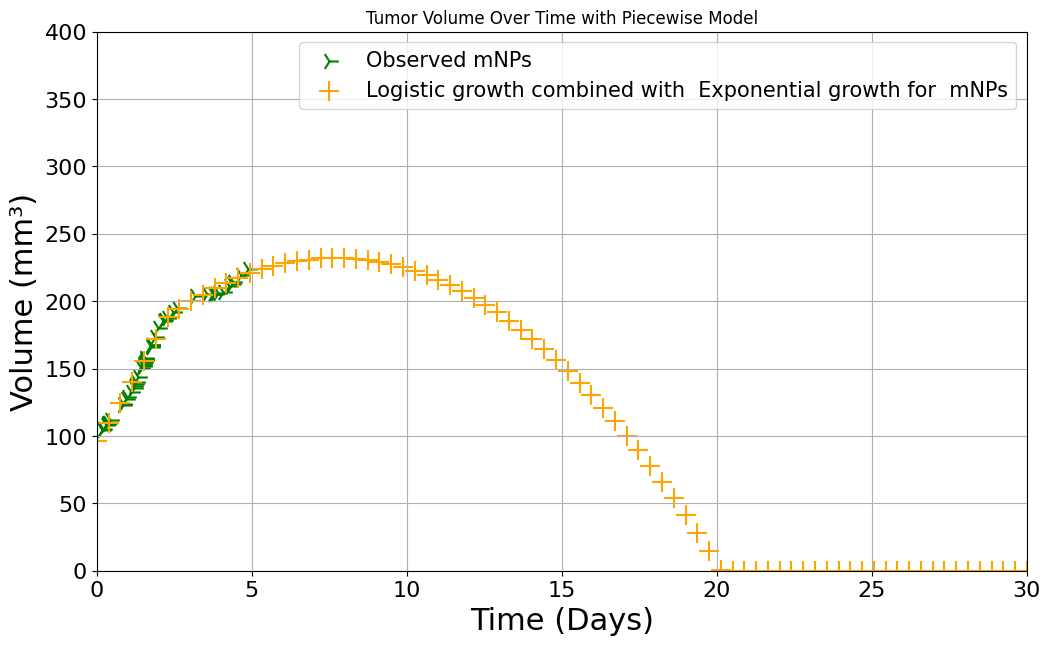

In [6]:


# Load and preprocess the data
df1 = pd.read_csv('/Users/pracyaim/Downloads/Mnps800.csv')
df1.columns = ['Time', 'Volume']


# Extract time and volume arrays

timem = df1['Time'].values 
volumem = df1['Volume'].values
 

# Randomly select  fewer data points

time = df1['Time'].values
volume = df1['Volume'].values
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 49, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function
def piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Exponential decay phase
    decay = A2 * np.exp(-k2 * (t - t_switch)) - alpha * (t - t_switch) - beta * (t - t_switch)**2
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, decay)

# Initial guesses for parameters

A1_initial = np.median(volumem)  # Maximum volume for logistic growth
k1_initial = 0.1          # Initial guess for logistic growth rate
A2_initial = np.median(volumem)  # Start of exponential decay phase
k2_initial = 0.01         # Decay rate for exponential phase
t_switch_initial = np.median(timem)  # Midpoint where logistic growth switches to exponential decay
alpha_initial = 0.1       # Initial guess for linear term in decay
beta_initial = 0.01       # Initial guess for quadratic term in decay

initial_guess = [A1_initial, k1_initial, A2_initial, k2_initial, t_switch_initial, alpha_initial, beta_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        timem, 
        volumem, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]),
        maxfev=1000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 7  # Fallback values

# Extract fitted parameters
A1, k1, A2, k2, t_switch, alpha, beta = popt

# Define the function to find when volume reaches zero
def find_zero(t):
    return piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta)




# Generate predictions over a range of time
time_rangem= np.linspace(0, 30, 80)
predicted_volumem = piecewise_model(time_rangem, *popt)

# Ensure predictions do not go below zero
predicted_volumem = np.maximum(predicted_volumem, 0)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))
plt.scatter(new_time, new_volume, color='green', s=180, marker='4', label='Observed mNPs')
plt.scatter(time_rangem, predicted_volumem,s=200, color='orange', marker='+', label='Logistic growth combined with  Exponential growth for  mNPs')


plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 400)
plt.legend(fontsize=15)
plt.title('Tumor Volume Over Time with Piecewise Model')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [7]:
# Create a DataFrame for time_range and predicted_volume
predicted_mnp = pd.DataFrame({
    'Time': time_rangem,
    'Predicted_Volume': predicted_volumem
})

# Save to a CSV file
predicted_mnp.to_csv('/Users/pracyaim/Downloads/predicted_mnp.csv', index=False)

# Confirm that the file has been saved
print("predicted_mnp.csv has been saved!")



predicted_mnp.csv has been saved!


# 3

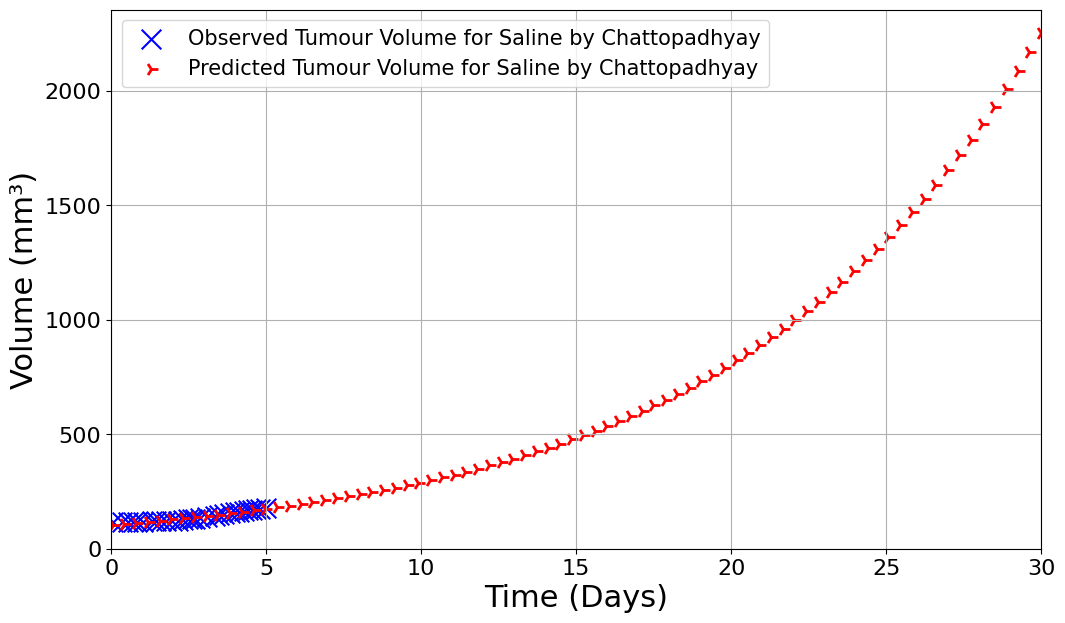

In [8]:

# Load and preprocess the data
data = pd.read_csv('/Users/pracyaim/Downloads/saline30.csv')
data.columns = ['Time', 'Volume']

# Extract time and volume arrays
time = data['Time'].values
volume = data['Volume'].values
# Randomly select  data points
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 30, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function with moderate exponential growth
def piecewise_model(t, A1, k1, t_switch, A2, k2):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Moderate exponential growth phase
    exponential_growth = A2 * np.exp(k2 * (t - t_switch))
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, logistic_growth[np.searchsorted(t, t_switch, side='left') - 1] + exponential_growth)

# Initial guesses for parameters
A1_initial = np.median(volume)  # Maximum volume for logistic growth
k1_initial = 0.1          # Initial guess for logistic growth rate
t_switch_initial = np.median(time)  # Midpoint where logistic growth switches to exponential growth
A2_initial = np.median(volume)  # Amplitude for exponential growth
k2_initial = 0.01         # Growth rate for exponential phase

initial_guess = [A1_initial, k1_initial, t_switch_initial, A2_initial, k2_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        time, 
        volume, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, 1]),  # Adjusted bounds for growth rate
        maxfev=10000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 5  # Fallback values

# Extract fitted parameters
A1, k1, t_switch, A2, k2 = popt

# Generate predictions over a range of time
time_range = np.linspace(0.05, 30, 80)
predicted_volume = piecewise_model(time_range, *popt)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))

# Scatter plot for observed data
plt.scatter(new_time, new_volume, color='blue', s=200, marker='x', label='Observed Tumour Volume for Saline by Chattopadhyay')

# Plot for the fitted model predictions (connected by a line)
plt.scatter(time_range, predicted_volume, color='red', s=100, marker='4', linewidth=2, label='Predicted Tumour Volume for Saline by Chattopadhyay')

# Customizing the plot
plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, max(predicted_volume) + 100)  # Adjust the upper limit for better visibility
plt.legend(fontsize=15)
plt.title('')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

In [9]:
# Create a DataFrame for time_range and predicted_volume
predicted_saline = pd.DataFrame({
    'Time': time_range,
    'Predicted_Volume': predicted_volume
})

# Save to a CSV file
predicted_saline.to_csv('/Users/pracyaim/Downloads/predicted_saline.csv', index=False)

# Confirm that the file has been saved
print("predicted_saline.csv has been saved!")



predicted_saline.csv has been saved!


# 4

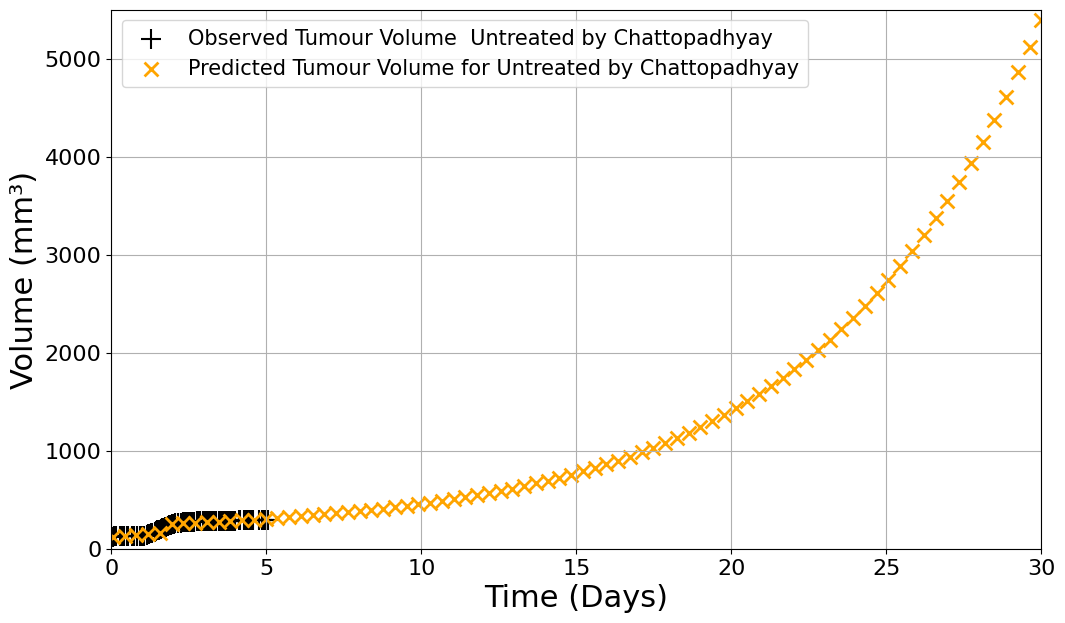

In [10]:


# Load and preprocess the data
data = pd.read_csv('/Users/pracyaim/Downloads/untreated85.csv')
data.columns = ['Time', 'Volume']

# Extract time and volume arrays
time = data['Time'].values
volume = data['Volume'].values
# Randomly select  data points
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 80, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function with moderate exponential growth
def piecewise_model(t, A1, k1, t_switch, A2, k2):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Moderate exponential growth phase
    exponential_growth = A2 * np.exp(k2 * (t - t_switch))
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, logistic_growth[np.searchsorted(t, t_switch, side='left') - 1] + exponential_growth)

# Initial guesses for parameters
A1_initial = np.median(volume)  # Maximum volume for logistic growth
k1_initial = 0.1          # Initial guess for logistic growth rate
t_switch_initial = np.median(time)  # Midpoint where logistic growth switches to exponential growth
A2_initial = np.median(volume)  # Amplitude for exponential growth
k2_initial = 0.01         # Growth rate for exponential phase

initial_guess = [A1_initial, k1_initial, t_switch_initial, A2_initial, k2_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        time, 
        volume, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, 1]),  # Adjusted bounds for growth rate
        maxfev=10000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 5  # Fallback values

# Extract fitted parameters
A1, k1, t_switch, A2, k2 = popt

# Generate predictions over a range of time
time_range = np.linspace(0.05, 30, 80)
predicted_volume = piecewise_model(time_range, *popt)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))

# Scatter plot for observed data
plt.scatter(new_time, new_volume, color='black', s=200, marker='+', label='Observed Tumour Volume  Untreated by Chattopadhyay')

# Plot for the fitted model predictions (connected by a line)
plt.scatter(time_range, predicted_volume, color='orange', s=100, marker='x', linewidth=2, label='Predicted Tumour Volume for Untreated by Chattopadhyay')

# Customizing the plot
plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, max(predicted_volume) + 100)  # Adjust the upper limit for better visibility
plt.legend(fontsize=15)
plt.title('')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

In [11]:
# Create a DataFrame for time_range and predicted_volume
predicted_untreated = pd.DataFrame({
    'Time': time_range,
    'Predicted_Volume': predicted_volume
})

# Save to a CSV file
predicted_untreated.to_csv('/Users/pracyaim/Downloads/predicted_untreated.csv', index=False)

# Confirm that the file has been saved
print("predicted_untreated.csv has been saved!")

predicted_untreated.csv has been saved!


# 5

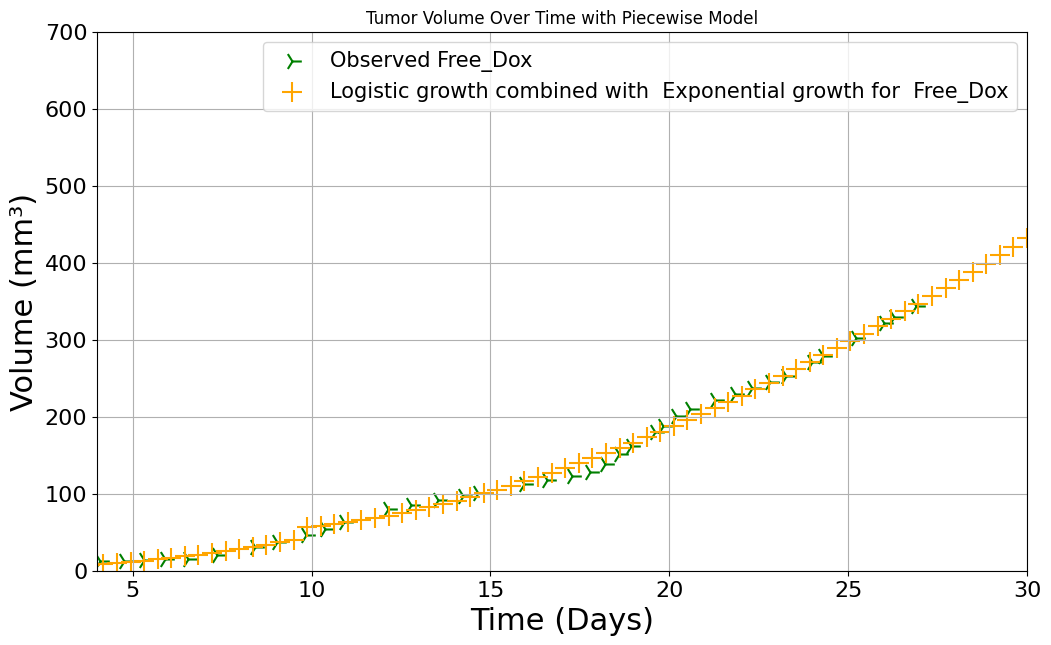

In [12]:

# Load and preprocess the data
df1 = pd.read_csv('/Users/pracyaim/Downloads/Free_Dox.csv')
df1.columns = ['Time', 'Volume']


# Extract time and volume arrays

timem = df1['Time'].values 
volumem = df1['Volume'].values
 

# Randomly select  fewer data points

time = df1['Time'].values
volume = df1['Volume'].values
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 40, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function
def piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Exponential decay phase
    decay = A2 * np.exp(-k2 * (t - t_switch)) - alpha * (t - t_switch) - beta * (t - t_switch)**2
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, decay)

# Initial guesses for parameters

A1_initial = np.median(volumem)  # Maximum volume for logistic growth
k1_initial = 5         # Initial guess for logistic growth rate
A2_initial = np.median(volumem)  # Start of exponential decay phase
k2_initial = 0.01         # Decay rate for exponential phase
t_switch_initial = np.median(timem)  # Midpoint where logistic growth switches to exponential decay
alpha_initial = 0.1       # Initial guess for linear term in decay
beta_initial = 0.01       # Initial guess for quadratic term in decay

initial_guess = [A1_initial, k1_initial, A2_initial, k2_initial, t_switch_initial, alpha_initial, beta_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        timem, 
        volumem, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]),
        maxfev=1000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 7  # Fallback values

# Extract fitted parameters
A1, k1, A2, k2, t_switch, alpha, beta = popt

# Define the function to find when volume reaches zero
def find_zero(t):
    return piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta)




# Generate predictions over a range of time
time_rangem= np.linspace(0, 30, 80)
predicted_volumem = piecewise_model(time_rangem, *popt)

# Ensure predictions do not go below zero
predicted_volumem = np.maximum(predicted_volumem, 0)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))
plt.scatter(new_time, new_volume, color='green', s=180, marker='4', label='Observed Free_Dox')
plt.scatter(time_rangem, predicted_volumem,s=200, color='orange', marker='+', label='Logistic growth combined with  Exponential growth for  Free_Dox')


plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(4, 30)
plt.ylim(0, 700)
plt.legend(fontsize=15)
plt.title('Tumor Volume Over Time with Piecewise Model')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [13]:
# Create a DataFrame for time_range and predicted_volume
predicted_Free_Dox = pd.DataFrame({
    'Time': time_rangem,
    'Predicted_Volume': predicted_volumem
})

# Save to a CSV file
predicted_Free_Dox.to_csv('/Users/pracyaim/Downloads/predicted_Free_Dox.csv', index=False)

# Confirm that the file has been saved
print("predicted_Free_Dox.csv has been saved!")

predicted_Free_Dox.csv has been saved!


# 6

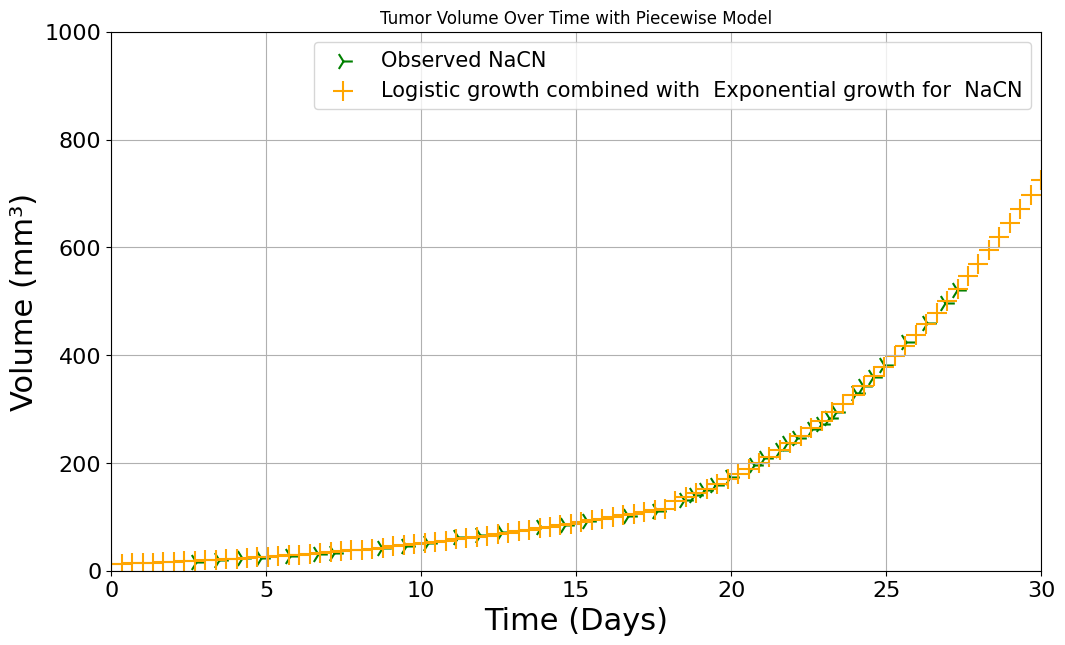

In [14]:



# Load and preprocess the data
df1 =  pd.read_csv('/Users/pracyaim/Downloads/NaCN.csv')
df1.columns = ['Time', 'Volume']


# Extract time and volume arrays

timem = df1['Time'].values 
volumem = df1['Volume'].values
 

# Randomly select  fewer data points

time = df1['Time'].values
volume = df1['Volume'].values
np.random.seed(42)  # Seed for reproducibility
indices = np.random.choice(len(time), 40, replace=False)
new_time = time[indices]
new_volume = volume[indices]

# Define the piecewise model function
def piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta):
    # Logistic growth phase
    logistic_growth = A1 / (1 + np.exp(-k1 * (t - t_switch)))
    
    # Exponential decay phase
    decay = A2 * np.exp(-k2 * (t - t_switch)) - alpha * (t - t_switch) - beta * (t - t_switch)**2
    
    # Combine both phases
    return np.where(t < t_switch, logistic_growth, decay)

# Initial guesses for parameters

A1_initial = np.median(volumem)  # Maximum volume for logistic growth
k1_initial = 0.1          # Initial guess for logistic growth rate
A2_initial = np.median(volumem)  # Start of exponential decay phase
k2_initial = 0.01         # Decay rate for exponential phase
t_switch_initial = np.median(timem)  # Midpoint where logistic growth switches to exponential decay
alpha_initial = 0.1       # Initial guess for linear term in decay
beta_initial = 0.01       # Initial guess for quadratic term in decay

initial_guess = [A1_initial, k1_initial, A2_initial, k2_initial, t_switch_initial, alpha_initial, beta_initial]

# Fit the piecewise model to the data with bounds
try:
    popt, pcov = curve_fit(
        piecewise_model, 
        timem, 
        volumem, 
        p0=initial_guess, 
        bounds=([0, 0, 0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]),
        maxfev=1000
    )
except RuntimeError as e:
    print(f"Error in fitting the model: {e}")
    popt = [np.nan] * 7  # Fallback values

# Extract fitted parameters
A1, k1, A2, k2, t_switch, alpha, beta = popt

# Define the function to find when volume reaches zero
def find_zero(t):
    return piecewise_model(t, A1, k1, A2, k2, t_switch, alpha, beta)




# Generate predictions over a range of time
time_rangem= np.linspace(0, 30, 90)
predicted_volumem = piecewise_model(time_rangem, *popt)

# Ensure predictions do not go below zero
predicted_volumem = np.maximum(predicted_volumem, 0)

# Plot the data and the fitted model
plt.figure(figsize=(12, 7))
plt.scatter(new_time, new_volume, color='green', s=180, marker='4', label='Observed NaCN')
plt.scatter(time_rangem, predicted_volumem,s=200, color='orange', marker='+', label='Logistic growth combined with  Exponential growth for  NaCN')


plt.xlabel('Time (Days)', fontsize=22)
plt.ylabel('Volume (mm³)', fontsize=22)
plt.xlim(0, 30)
plt.ylim(0, 1000)
plt.legend(fontsize=15)
plt.title('Tumor Volume Over Time with Piecewise Model')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [15]:
# Create a DataFrame for time_range and predicted_volume
predicted_NaCN = pd.DataFrame({
    'Time': time_rangem,
    'Predicted_Volume': predicted_volumem
})

# Save to a CSV file
predicted_NaCN.to_csv('/Users/pracyaim/Downloads/predicted_NaCN.csv', index=False)

# Confirm that the file has been saved
print("predicted_NaCN.csv has been saved!")

predicted_NaCN.csv has been saved!


# GUI

In [16]:


# Load the predicted datasets
Free_Dox = pd.read_csv('/Users/pracyaim/Downloads/predicted_Free_Dox.csv')  # predicted_Free_Dox.csv
NaCNs_Dox = pd.read_csv('/Users/pracyaim/Downloads/predicted_NaCNs_Dox.csv')  # predicted_NaCNs_Dox.csv
NaCN = pd.read_csv('/Users/pracyaim/Downloads/predicted_NaCN.csv')  # predicted_NaCN.csv
untreated = pd.read_csv('/Users/pracyaim/Downloads/predicted_untreated.csv')  # predicted_untreated.csv
saline = pd.read_csv('/Users/pracyaim/Downloads/predicted_saline.csv')  # predicted_saline.csv
mNP = pd.read_csv('/Users/pracyaim/Downloads/predicted_mnp.csv')  # predicted_mnp.csv
mNP_FDG = pd.read_csv('/Users/pracyaim/Downloads/predicted_mnpfdg.csv')  # predicted_mnpfdg.csv
PAS = pd.read_csv('/Users/pracyaim/Downloads/predicted_PAS.csv') 
# Rename columns for consistency
Free_Dox.columns = ['Time', 'Volume']
NaCNs_Dox.columns = ['Time', 'Volume']
NaCN.columns = ['Time', 'Volume']
untreated.columns = ['Time', 'Volume']
saline.columns = ['Time', 'Volume']
mNP.columns = ['Time', 'Volume']
mNP_FDG.columns = ['Time', 'Volume']
PAS.columns = ['Time', 'Volume']

# Prepare data for training on each dataset separately
def prepare_and_train(df, dataset_name):
    # Extract features (Time) and target (Volume)
    X = df[['Time']]  # Features (Time)
    y = df['Volume']  # Target (Volume)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data (you can use MinMaxScaler)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Save the trained model and scaler with unique names
    joblib.dump(model, f'tumor_volume_model_{dataset_name}.pkl')
    joblib.dump(scaler, f'scaler_{dataset_name}.pkl')

    # Optionally evaluate the model
    print(f"Model Score for {dataset_name}: {model.score(X_test_scaled, y_test)}")

# Train models on each dataset separately
prepare_and_train(Free_Dox, 'Free_Dox')
prepare_and_train(NaCNs_Dox, 'NaCNs_Dox')
prepare_and_train(NaCN, 'NaCN')
prepare_and_train(untreated, 'untreated')
prepare_and_train(saline, 'saline')
prepare_and_train(mNP, 'mNP')
prepare_and_train(mNP_FDG, 'mNP_FDG')
prepare_and_train(PAS, 'PAS')


Model Score for Free_Dox: 0.9978643707210139
Model Score for NaCNs_Dox: 0.9910938649222911
Model Score for NaCN: 0.9968104126020334
Model Score for untreated: 0.9947558647669922
Model Score for saline: 0.996693592930426
Model Score for mNP: 0.9925882692132676
Model Score for mNP_FDG: 0.9980557269839925
Model Score for PAS: 0.9850088378082243


In [17]:
# Add a 'Name' column to each dataset to identify the source
Free_Dox['Name'] = 'Free_Dox'
NaCNs_Dox['Name'] = 'NaCNs_Dox'
NaCN['Name'] = 'NaCN'
untreated['Name'] = 'Untreated'
saline['Name'] = 'Saline'
mNP['Name'] = 'mNP'
mNP_FDG['Name'] = 'mNP_FDG'
PAS['Name'] = 'PAS'

# Combine the datasets into one DataFrame
combined_df = pd.concat([Free_Dox, NaCNs_Dox, NaCN, untreated, saline, mNP, mNP_FDG,PAS], ignore_index=True)

# Ensure the combined dataframe has the correct columns
combined_df.columns = ['Time', 'Volume', 'Name']

# Prepare the data (Features: Time and Name, Target: Volume)
X = combined_df[['Time', 'Name']]  # Features: Time and Name
y = combined_df['Volume']  # Target: Volume

# Convert 'Name' (categorical) into numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Name'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model and scaler to files (optional, for later use)
joblib.dump(model, 'combined_model.pkl')  # Save model
joblib.dump(scaler, 'combined_scaler.pkl')  # Save scaler

# Evaluate the model and print the score
score = model.score(X_test_scaled, y_test)
print(f'Model Test Score for Combined Model: {score:.4f}')


Model Test Score for Combined Model: 0.9966


In [18]:


# Assuming you have a combined dataframe 'combined_df' with 'Time', 'Volume', and 'Name' columns

# Prepare your features (X) and target (y)
X = combined_df[['Time', 'Name']]  # Features (time and Name)
y = combined_df['Volume']  # Target variable (Volume)

# Convert categorical 'Name' column into one-hot encoding
X = pd.get_dummies(X, columns=['Name'], drop_first=True)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for some models like linear regression or neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform test data using the trained scaler

# Initialize the model (DecisionTreeRegressor in this case)
model = DecisionTreeRegressor()

# Train the model using the training data
model.fit(X_train_scaled, y_train)

# Save the trained model and scaler to files
joblib.dump(model, 'combined_model.pkl')  # Save the model
joblib.dump(scaler, 'combined_scaler.pkl')  # Save the scaler



['combined_scaler.pkl']

In [19]:
import joblib

# Load the saved model and scaler
model = joblib.load('combined_model.pkl')
scaler = joblib.load('combined_scaler.pkl')

# Prepare the input data (e.g., time and dataset name for prediction)
input_data = pd.DataFrame({'Time': [3.6], 'Name': ['PAS']})  # Example input

# Convert categorical data to one-hot encoding
input_data = pd.get_dummies(input_data, columns=['Name'], drop_first=False)

# Ensure the input data matches the model's expected feature columns
input_data = input_data.reindex(columns=X.columns, fill_value=0)

# Scale the input data
scaled_input = scaler.transform(input_data)

# Make the prediction
predicted_volume = model.predict(scaled_input)[0]

# Print or return the predicted volume
print(f"Predicted Volume: {predicted_volume:.2f} mm³")



Predicted Volume: 88.59 mm³


In [20]:
def predict_volume():
    try:
        # Get input values from the Tkinter GUI
        time_input = float(time_entry.get())  # Retrieve value from 'time_entry' widget
        dataset_name = dataset_var.get()  # Get the selected dataset name
        
        # Continue with the rest of the prediction logic here...
        input_data = pd.DataFrame({'Time': [time_input], 'Name': [dataset_name]})
        input_data = pd.get_dummies(input_data, columns=['Name'], drop_first=False)
        input_data = input_data.reindex(columns=X.columns, fill_value=0)

        scaled_input = scaler.transform(input_data)
        predicted_volume = model.predict(scaled_input)[0]

        # Display the predicted result
        result_label.config(text=f"Predicted Volume: {predicted_volume:.2f} mm³")
    except ValueError:
        # Handle invalid inputs
        messagebox.showerror("Invalid Input", "Please enter a valid number for Time.")
    except Exception as e:
        # Handle other errors
        messagebox.showerror("Error", f"Prediction Error: {str(e)}")



In [ ]:

# Load the model and scaler
model = joblib.load('combined_model.pkl')
scaler = joblib.load('combined_scaler.pkl')

# Load the new predicted datasets
data = { 'mNP': pd.read_csv('/Users/pracyaim/Downloads/predicted_mnp.csv'),
            'PAS': pd.read_csv('/Users/pracyaim/Downloads/predicted_PAS.csv'),
    'mNP_FDG': pd.read_csv('/Users/pracyaim/Downloads/predicted_mnpfdg.csv')  ,
    'Free_Dox': pd.read_csv('/Users/pracyaim/Downloads/predicted_Free_Dox.csv'),
    'NaCN': pd.read_csv('/Users/pracyaim/Downloads/predicted_NaCN.csv'),
    'Untreated': pd.read_csv('/Users/pracyaim/Downloads/predicted_untreated.csv'),
    'Saline': pd.read_csv('/Users/pracyaim/Downloads/predicted_saline.csv')
   
}

# Extracting features from one of the datasets (example: 'NaCN') to define the model's expected columns
sample_data = data['mNP_FDG']  # Can be any dataset that fits the model
sample_data['Name'] = 'mNP_FDG'
X_sample = pd.get_dummies(sample_data[['Time', 'Name']], columns=['Name'], drop_first=False)
input_columns = X_sample.columns  # Store the columns for reindexing

# Initialize Tkinter window
root = tk.Tk()
root.title("Tumor Volume Prediction and Visualization")

# Helper function for prediction
def predict_volume():
    try:
        # Get input values
        time_input = float(time_entry.get())  # Convert text input to float
        dataset_name = dataset_var.get()  # Get the selected dataset name
        species = species_entry.get().strip() 

        # Validate time input (should not be greater than 5)
        if time_input > 30:
            raise ValueError("Please try valid Time")

        # Validate species (should only allow "mice")
        if species.lower() != "mice" and species.lower() != "mices":
            raise ValueError("The treatment selected currently works only on Mice species.")

        # Prepare input data for prediction
        input_data = pd.DataFrame({'Time': [time_input], 'Name': [dataset_name]})
        input_data = pd.get_dummies(input_data, columns=['Name'], drop_first=False)
        
        # Reindex input data to match the model's expected columns, ensuring all categories are present
        input_data = input_data.reindex(columns=X.columns, fill_value=0)

        # Scale input data and predict volume
        scaled_input = scaler.transform(input_data)
        predicted_volume = model.predict(scaled_input)[0]

        # Display the predicted volume
        result_label.config(text=f"Results: Predicted Volume is {predicted_volume:.2f} mm³")
        
    except ValueError as ve:
        messagebox.showerror("Invalid Input", str(ve))  # Show specific ValueError message
    except Exception as e:
        messagebox.showerror("Error", f"Prediction Error: {str(e)}")

# Layout for the GUI
left_frame = tk.Frame(root)
left_frame.grid(row=0, column=0, padx=20, pady=10)

# Prediction section in the left frame
tk.Label(left_frame, text="Tumor Volume Prediction", font=("Helvetica", 16, "bold")).grid(row=0, column=0, pady=10, padx=10)

# Dataset selection dropdown
dataset_var = tk.StringVar(value="Saline")
tk.Label(left_frame, text="Select Treatment:").grid(row=1, column=0, padx=10, pady=5)

# Create a custom style for the dropdown to make it blue
style = ttk.Style()
style.configure('TCombobox', fieldbackground='lightblue', background='lightblue', foreground='black')

dataset_dropdown = ttk.Combobox(left_frame, values=list(data.keys()), textvariable=dataset_var, style='TCombobox')
dataset_dropdown.grid(row=1, column=1, padx=10, pady=5)

# Time entry box
tk.Label(left_frame, text="Time (Days):").grid(row=2, column=0, padx=10, pady=5)
time_entry = tk.Entry(left_frame)
time_entry.grid(row=2, column=1, padx=10, pady=5)

# Species entry box (text input)
tk.Label(left_frame, text="Species (Mice, Pigs, Humans):").grid(row=3, column=0, padx=10, pady=5)
species_entry = tk.Entry(left_frame)
species_entry.grid(row=3, column=1, padx=10, pady=5)

# Predict button with blue background and white text
predict_button = tk.Button(left_frame, text="Predict Volume", command=predict_volume, bg='blue', fg='blue')
predict_button.grid(row=4, column=0, columnspan=2, pady=10)

# Display predicted volume result
result_label = tk.Label(left_frame, text="Results: ")
result_label.grid(row=5, column=0, columnspan=2, pady=10)

# Start the Tkinter event loop
root.mainloop()
